<a href="https://colab.research.google.com/github/Aryan27Mathur/MMSegDME/blob/main/MMSegAndDME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation (Run Once)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!git checkout main
!pip install -e .
!pip install ftfy

import mmseg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 407.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 18.8 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 MB 4.2 MB/s eta 0:00:00
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16342, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 16342 (delta 10), reused 33 (delta 2), pack-reused 16289
Receiving objects: 100% (16342/16342), 22.82 MiB | 21.40 MiB/s, done.
Resolving deltas: 100% (11377/11377), done.
/content/mmsegmentation
Already on 'main'
Your branch is up to date with 'origin/main'.
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation
     ━━━━━

In [ ]:
#To verify, run only this code (if it doesn't work, run the code block above)
import mmseg
print(mmseg.__version__)
# Example output: 1.0.0

1.2.2


In [ ]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from os import path

subject_path = [f"/content/Subject_{i:02d}.mat" for i in range(1, 11)]
mat = loadmat(subject_path[4])
subject_path.pop(3)
fluid_class = 9

print(mat['manualFluid1'].shape)


(496, 768, 61)


In [ ]:
def get_valid_idx(manualLayer):
    idx = []
    for i in range(0,61):
        temp = manualLayer[:,:,i]
        if np.sum(temp) != 0:
            idx.append(i)
    print(idx)
    return idx


# 0~9
def get_valid_img_seg(mat):
    manualLayer = np.array(mat['manualLayers1'], dtype=np.uint16)
    manualFluid = np.array(mat['manualFluid1'], dtype=np.uint16)
    img = np.array(mat['images'], dtype=np.uint8)
    valid_idx = get_valid_idx(manualLayer)

    manualFluid = manualFluid[:, :, valid_idx]
    manualLayer = manualLayer[:, :, valid_idx]

    print(manualLayer.shape)

    seg = np.zeros((496, 768, 11))
    seg[manualFluid > 0] = fluid_class
    max_col = -100
    min_col = 900
    for b_scan_idx in range(0, 11):
        for col in range(768):
            cur_col = manualLayer[:, col, b_scan_idx]
            if np.sum(cur_col) == 0:
                continue

            max_col = max(max_col, col)
            min_col = min(min_col, col)

            labels_idx = cur_col.tolist()

            last_st = None
            last_ed = None
            for label, (st, ed) in enumerate(zip([0]+labels_idx, labels_idx+[-1])):
                if st == 0 and ed == 0:
                    st = last_ed
                    while(seg[st, col, b_scan_idx] == fluid_class):
                        st += 1

                    while(seg[st, col, b_scan_idx] != fluid_class):
                        seg[st, col, b_scan_idx] = label
                        st += 1
                        if st >= 496:
                            break
                    continue
                if ed == 0:
                    ed = st + 1
                    while(seg[ed, col, b_scan_idx] != fluid_class):
                        ed += 1

                if st == 0 and label != 0:
                    st = ed-1
                    while(seg[st, col, b_scan_idx] != fluid_class):
                        st -= 1
                    st += 1

                seg[st:ed, col, b_scan_idx] = label
                last_st = st
                last_ed = ed

    seg[manualFluid > 0] = fluid_class

    # Ensure img and seg are cropped to the same columns
    img = img[:, min_col:max_col+1]
    seg = seg[:, min_col:max_col+1, :]

    return img, seg


img, seg = get_valid_img_seg(mat)
print(seg.shape, img.shape)

[8, 13, 18, 23, 26, 28, 30, 33, 38, 43, 48]
(8, 768, 11)
(496, 542, 11) (496, 542, 61)


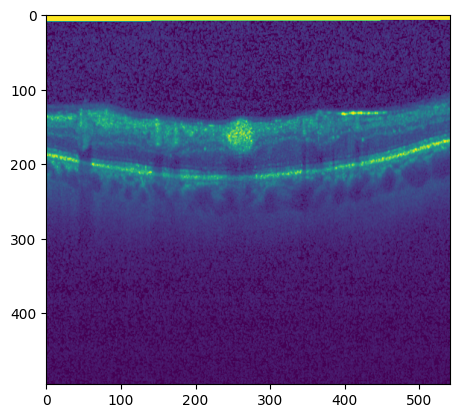

In [ ]:
plt.imshow(img[:, :, 2])

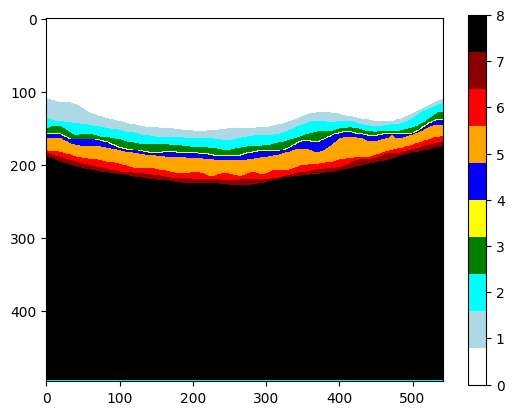

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Class to Color Table
class_to_color = {
    'c0': 'white',
    'c1': 'lightblue',
    'c2': 'cyan',
    'c3': 'green',
    'c4': 'yellow',
    'c5': 'blue',
    'c6': 'orange',
    'c7': 'red',
    'c8': 'darkred',
    'c9': 'black'
}

# Create a custom colormap
colors = [class_to_color[class_label] for class_label in class_to_color]
custom_cmap = ListedColormap(colors)

plt.imshow(seg[:, :, 10], cmap=custom_cmap)
plt.colorbar()
plt.show()

/Subject_01.mat
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]
(8, 768, 11)
/Subject_02.mat
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]
(8, 768, 11)
/Subject_03.mat
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]
(8, 768, 11)
/Subject_05.mat
[8, 13, 18, 23, 26, 28, 30, 33, 38, 43, 48]
(8, 768, 11)
/Subject_06.mat
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]
(8, 768, 11)
/Subject_07.mat
[11, 16, 21, 26, 29, 31, 33, 36, 41, 46, 51]
(8, 768, 11)
/Subject_08.mat
[8, 13, 18, 23, 26, 28, 30, 33, 38, 43, 48]
(8, 768, 11)
/Subject_09.mat
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]
(8, 768, 11)
[10, 15, 20, 25, 28, 30, 32, 35, 40, 45, 50]
(8, 768, 11)


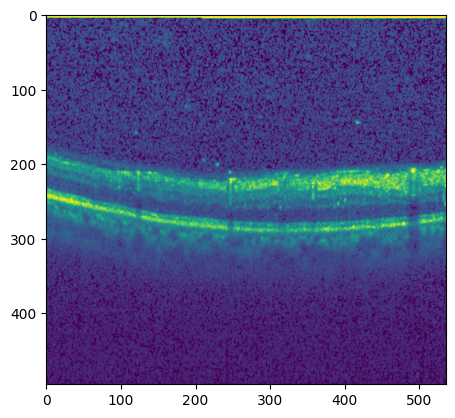

In [ ]:
x_train, y_train, x_val, y_val = [], [], [], []

for path in subject_path[:-1]:
  mat = loadmat(path)
  print(path)
  img, seg = get_valid_img_seg(mat)
  x_train.extend([img[:, :, i] for i in range(seg.shape[2])])
  y_train.extend([seg[:, :, i] for i in range(seg.shape[2])])


mat = loadmat(subject_path[-1])
img, seg = get_valid_img_seg(mat)
x_val.extend([img[:, :, i] for i in range(seg.shape[2])])
y_val.extend([seg[:, :, i] for i in range(seg.shape[2])])

plt.imshow(x_train[5])

In [ ]:
len(x_train), len(y_train), len(x_val), len(y_val)

(88, 88, 11, 11)

# Dataset Preperation

In [ ]:
import os
from PIL import Image
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

# Define your classes and palette
classes = ('background', 'NFL', 'GCL-IPL', 'INL', 'OPL', 'Fluid', 'ONL-ISM', 'ISE', 'OS-RPE')
palette = [
    [255, 255, 255],     # background
    [1, 127, 254],  # NFL - Light Blue
    [0, 255, 255], # GCL-IPL - Cyan
    [0, 128, 0],   # INL - Green
    [255, 255, 0], # OPL - Yellow
    [0, 0, 255],   # Fluid - Blue
    [255, 165, 0], # ONL-ISM - Orange
    [255, 0, 0],   # ISE - Red
    [139, 0, 0]    # OS-RPE - Dark Red
]
flat_palette = [c for color in palette for c in color]
print(palette[1])
def save_images(images, output_dir, img_suffix):
    os.makedirs(output_dir, exist_ok=True)
    for i, img in enumerate(images):
        img_path = os.path.join(output_dir, f'image_{i + 1:03d}{img_suffix}')
        Image.fromarray(img).save(img_path)

def save_colored_images(segmentation_maps, output_dir, img_suffix, palette):
    os.makedirs(output_dir, exist_ok=True)
    for i, seg_map in enumerate(segmentation_maps):
        img_path = os.path.join(output_dir, f'image_{i + 1:03d}{img_suffix}')
        indexed_img = Image.fromarray(seg_map.astype(np.uint8), mode='P')
        indexed_img.putpalette(flat_palette)
        indexed_img.save(img_path)

# Save training images
save_images(x_train, 'content/dme_dataset/img_dir/train', '.jpg')
save_colored_images(y_train, 'content/dme_dataset/ann_dir/train', '.png', palette)

# Save validation images
save_images(x_val, 'content/dme_dataset/img_dir/val', '.jpg')
save_colored_images(y_val, 'content/dme_dataset/ann_dir/val', '.png', palette)

[1, 127, 254]


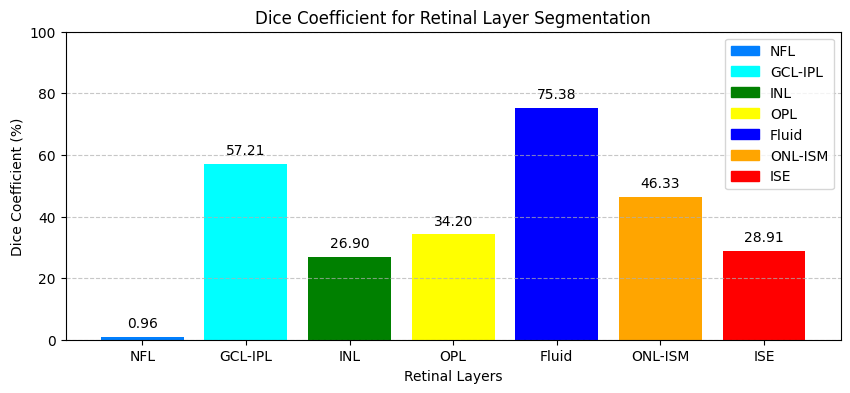

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Segmentation Performance Metrics
classes = ['NFL', 'GCL-IPL', 'INL', 'OPL', 'Fluid', 'ONL-ISM', 'ISE']
dice_coefficients = [0.96, 57.21, 26.90, 34.20, 75.38, 46.33, 28.91]

# Define your classes and palette
all_classes = ('background', 'NFL', 'GCL-IPL', 'INL', 'OPL', 'Fluid', 'ONL-ISM', 'ISE', 'OS-RPE')
palette = [
    [255, 255, 255],     # background
    [1, 127, 254],  # NFL - Light Blue
    [0, 255, 255], # GCL-IPL - Cyan
    [0, 128, 0],   # INL - Green
    [255, 255, 0], # OPL - Yellow
    [0, 0, 255],   # Fluid - Blue
    [255, 165, 0], # ONL-ISM - Orange
    [255, 0, 0],   # ISE - Red
    [139, 0, 0]    # OS-RPE - Dark Red
]

# Normalize color values to the range [0, 1]
normalized_palette = [[comp / 255.0 for comp in color] for color in palette]
class_to_color = dict(zip(all_classes, normalized_palette))
bar_colors = [class_to_color[class_name] for class_name in classes]

# Plotting the histogram with skinnier bars
plt.figure(figsize=(10, 4))
bars = plt.bar(classes, dice_coefficients, color=bar_colors, width=0.8)  # Adjust the width as needed
plt.xlabel('Retinal Layers')
plt.ylabel('Dice Coefficient (%)')
plt.title('Dice Coefficient for Retinal Layer Segmentation')
plt.ylim(0, 100)  # Set the y-axis limit to percentages (0-100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of the bars
for i, value in enumerate(dice_coefficients):
    plt.text(i, value + 2, f'{value:.2f}', ha='center', va='bottom')

# Create a custom legend starting from index 0
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=color) for color in normalized_palette[1:-1]]  # Exclude background and OS-RPE
plt.legend(legend_labels, classes, loc='upper right')  # Exclude OS-RPE from legend

# Save the image as a JPG file
plt.savefig('dice_coefficient_histogram.jpg', bbox_inches='tight')
plt.show()


In [ ]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

@DATASETS.register_module()
class DMESegDataset(BaseSegDataset):
    METAINFO = dict(classes=classes, palette=palette)

    def __init__(self, img_suffix='.jpg', seg_map_suffix='.png', **kwargs):
        super().__init__(img_suffix=img_suffix, seg_map_suffix=seg_map_suffix, **kwargs)


KeyError: ignored

In [ ]:
!mim download mmsegmentation --config deeplabv3_r101-d8_4xb4-40k_pascal-context-480x480 --dest .

processing deeplabv3_r101-d8_4xb4-40k_pascal-context-480x480...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.9/332.9 MiB 9.9 MB/s eta 0:00:00
Successfully downloaded deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth to /content/mmsegmentation
Successfully dumped deeplabv3_r101-d8_4xb4-40k_pascal-context-480x480.py to /content/mmsegmentation


# PSPNet CityScapes Model

In [ ]:
from mmengine import Config

cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'data/cityscapes/'
dataset_type = 'CityscapesDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=4000, type='CheckpointHook'),
    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.

In [ ]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (512, 1024)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 10
cfg.model.auxiliary_head.num_classes = 10

# Modify dataset type and path
cfg.dataset_type = 'DMESegDataset'
cfg.data_root = 'content/dme_dataset'

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(496, 768), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(496, 768), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='img_dir/train', seg_map_path='ann_dir/train')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline


cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='img_dir/val', seg_map_path='ann_dir/val')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline


cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = 'fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './output/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'content/dme_dataset'
dataset_type = 'DMESegDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=200, type='CheckpointHook'),
    logger=dict(interval=10, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.75

# DeeplabsV3 Model

In [ ]:
from mmengine import Config

cfg = Config.fromfile('configs/deeplabv3/deeplabv3_r101-d8_4xb4-40k_pascal-context-480x480.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    480,
    480,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        480,
        480,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'data/VOCdevkit/VOC2010/'
dataset_type = 'PascalContextDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=4000, type='CheckpointHook'),
    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_scale = (
    520,
    520,
)
load_from = None
log_level

In [ ]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (480, 480)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 10
cfg.model.auxiliary_head.num_classes = 10

# Modify dataset type and path
cfg.dataset_type = 'DMESegDataset'
cfg.data_root = 'content/dme_dataset'

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(496, 768), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(496, 768), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='img_dir/train', seg_map_path='ann_dir/train')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline


cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='img_dir/val', seg_map_path='ann_dir/val')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline


cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = 'deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './output/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    480,
    480,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        480,
        480,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'content/dme_dataset'
dataset_type = 'DMESegDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=200, type='CheckpointHook'),
    logger=dict(interval=10, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_scale = (
    520,
    520,
)
load_from = 'deeplabv3_r101-d8_480x480

In [ ]:
cfg.dump('deeplabs_config.py')

In [ ]:
from mmengine import Config
from mmengine.runner import Runner

cfg = Config.fromfile('deeplabs_config.py')
runner = Runner.from_cfg(cfg)
runner.train()

12/18 05:45:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=s

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


12/18 05:45:41 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
12/18 05:45:41 - mmengine - INFO - load model from: open-mmlab://resnet101_v1c
12/18 05:45:41 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet101_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet101_v1c-e67eebb6.pth" to /root/.cache/torch/hub/checkpoints/resnet101_v1c-e67eebb6.pth


12/18 05:45:52 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([60, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([60]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([60, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([60]) from checkpoint, the shape in current model is torch.Size([10]).
12/18 05

OutOfMemoryError: ignored

In [ ]:
# from mmengine.runner import Runner

# runner = Runner.from_cfg(cfg)
# runner.train()

12/18 05:38:12 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=s

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

12/18 05:38:13 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
12/18 05:38:13 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:60: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


AssertionError: ignored

Loads checkpoint by local backend from path: /content/mmsegmentation/deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([60, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([60]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([60, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([60]) from checkpoint, the shape in current model is torch.Size([10]).


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


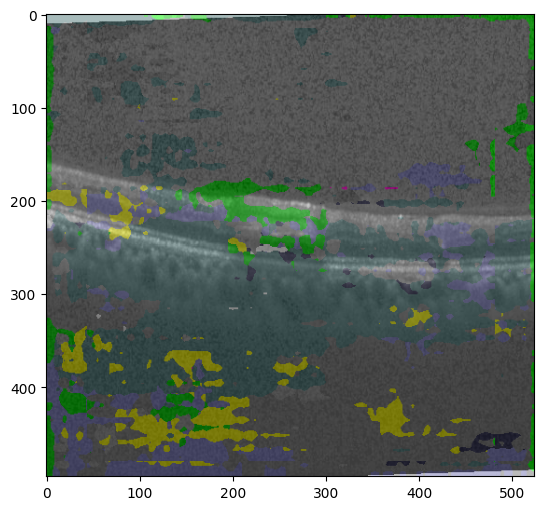

In [ ]:
import mmcv
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = '/content/mmsegmentation/deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')
img = mmcv.imread('/content/mmsegmentation/content/dme_dataset/img_dir/val/image_002.jpg')
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result, with_labels=False)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/dme_dataset/img_dir/val'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'Original', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


fig.savefig('/content/mmsegmentation/content/ground_truth.png', bbox_inches='tight', dpi=300)


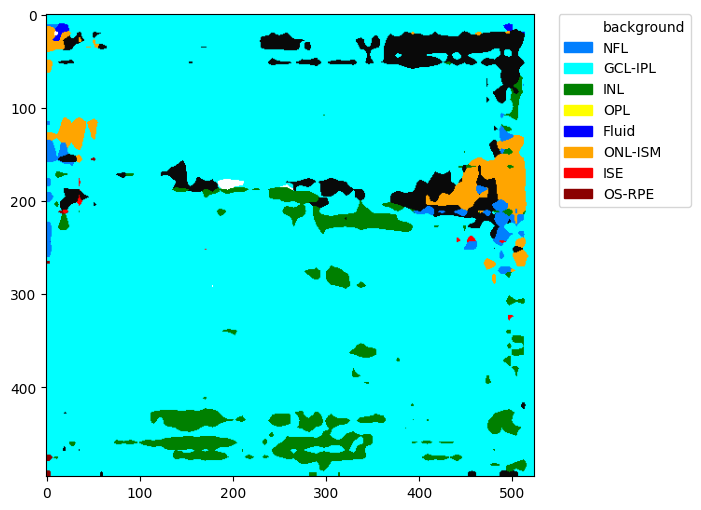

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Assuming result is a SegDataSample object from the inference
seg_result = result.pred_sem_seg.data.cpu().numpy()[0]  # Accessing and moving to CPU

# Defining classes and palette
classes = ('background', 'NFL', 'GCL-IPL', 'INL', 'OPL', 'Fluid', 'ONL-ISM', 'ISE', 'OS-RPE')
palette = [[255, 255, 255], [1, 127, 254], [0, 255, 255], [0, 128, 0], [255, 255, 0], [0, 0, 255], [255, 165, 0], [255, 0, 0], [139, 0, 0]]

# Convert to PIL for easy palette application
seg_img = Image.fromarray(seg_result.astype(np.uint8), mode='P')
seg_img.putpalette(np.array(palette, dtype=np.uint8).flatten())

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(seg_img)

# Creating legend
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


In [ ]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

12/18 03:08:01 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=s

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


12/18 03:08:03 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
12/18 03:08:03 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:60: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner.train()

12/18 01:09:11 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


12/18 01:09:11 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
12/18 01:09:11 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/hub/checkpoints/resnet50_v1c-2cccc1ad.pth


12/18 01:09:20 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([10]).
12/18 01:09:20 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


12/18 01:11:28 - mmengine - INFO - Iter(val) [10/11]    eta: 0:00:00  time: 0.4248  data_time: 0.0354  memory: 9265  
12/18 01:11:28 - mmengine - INFO - per class results:
12/18 01:11:28 - mmengine - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.42 | 96.47 |
|    NFL     |  0.0  |  0.0  |
|  GCL-IPL   | 20.11 | 41.77 |
|    INL     |  8.87 | 15.74 |
|    OPL     |  9.92 | 19.64 |
|   Fluid    | 50.41 | 77.18 |
|  ONL-ISM   | 25.23 | 46.07 |
|    ISE     | 13.61 | 19.52 |
|   OS-RPE   | 96.48 | 98.83 |
+------------+-------+-------+
12/18 01:11:28 - mmengine - INFO - Iter(val) [11/11]    aAcc: 88.5500  mIoU: 35.3400  mAcc: 46.1400  data_time: 0.0329  time: 0.3950


EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

Loads checkpoint by local backend from path: /content/mmsegmentation/output/tutorial/iter_200.pth


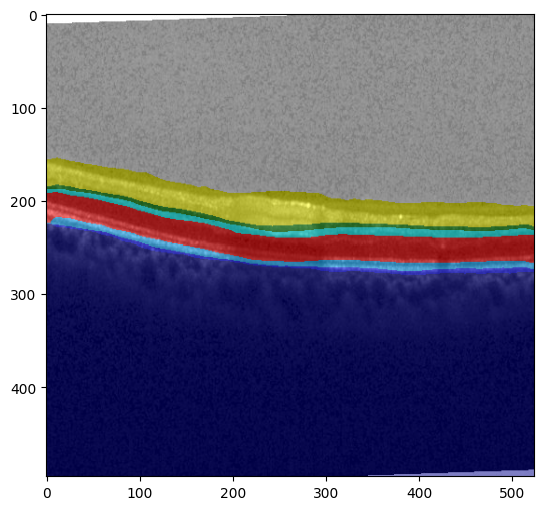

In [ ]:
import mmcv
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = '/content/mmsegmentation/output/tutorial/iter_200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')
img = mmcv.imread('/content/mmsegmentation/content/dme_dataset/img_dir/val/image_002.jpg')
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result, with_labels=False)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
import os
import mmcv
from mmseg.apis import init_model, inference_model, show_result_pyplot

checkpoint_path = '/content/mmsegmentation/deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')


val_img_dir = '/content/mmsegmentation/content/dme_dataset/img_dir/train'
output_dir = '/content/mmsegmentation/content/deeplabs_prefinetune'
os.makedirs(output_dir, exist_ok=True)

for img_file in sorted(os.listdir(val_img_dir)):
    img_path = os.path.join(val_img_dir, img_file)
    img = mmcv.imread(img_path)
    result = inference_model(model, img)
    output_img_path = os.path.join(output_dir, f'output_{img_file}.png')
    vis_result = show_result_pyplot(model, img, result, with_labels=False, out_file=output_img_path)


Loads checkpoint by local backend from path: /content/mmsegmentation/deeplabv3_r101-d8_480x480_40k_pascal_context_20200911_204118-1aa27336.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([60, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([60]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([60, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([60]) from checkpoint, the shape in current model is torch.Size([10]).


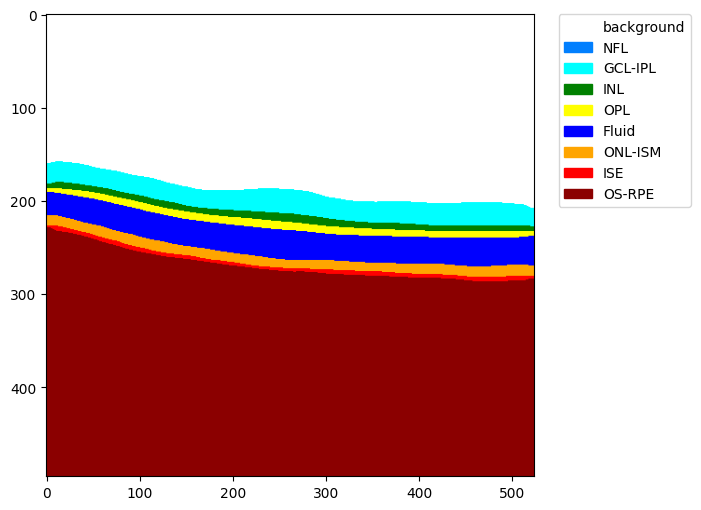

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Assuming result is a SegDataSample object from the inference
seg_result = result.pred_sem_seg.data.cpu().numpy()[0]  # Accessing and moving to CPU

# Defining classes and palette
classes = ('background', 'NFL', 'GCL-IPL', 'INL', 'OPL', 'Fluid', 'ONL-ISM', 'ISE', 'OS-RPE')
palette = [[255, 255, 255], [1, 127, 254], [0, 255, 255], [0, 128, 0], [255, 255, 0], [0, 0, 255], [255, 165, 0], [255, 0, 0], [139, 0, 0]]

# Convert to PIL for easy palette application
seg_img = Image.fromarray(seg_result.astype(np.uint8), mode='P')
seg_img.putpalette(np.array(palette, dtype=np.uint8).flatten())

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(seg_img)

# Creating legend
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


In [ ]:
import os
import mmcv
from mmseg.apis import inference_model
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np


def save_segmentation_with_legend(seg_result, output_img_path, classes, palette):
    # Convert to PIL for easy palette application
    seg_img = Image.fromarray(seg_result.astype(np.uint8), mode='P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8).flatten())

    # Plotting and adding legend
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(seg_img)
    patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Save the plot as an image
    plt.savefig(output_img_path, bbox_inches='tight')
    plt.close(fig)

# Path to validation images and output directory
val_dir = '/content/mmsegmentation/content/dme_dataset/img_dir/val'
output_dir = '/content/mmsegmentation/content/extract_seg_1'
os.makedirs(output_dir, exist_ok=True)

for img_file in os.listdir(val_dir):
    # Assuming result is a SegDataSample object from the inference
    seg_result = result.pred_sem_seg.data.cpu().numpy()[0]  # Accessing and moving to CPU
    output_img_path = os.path.join(output_dir, img_file.replace('.jpg', '.png'))
    save_segmentation_with_legend(seg_result, output_img_path, classes, palette)

print("Processing and saving completed.")

Processing and saving completed.


In [ ]:
import os
import mmcv
from mmseg.apis import inference_model

# Path to validation images and output directory
val_dir = '/content/mmsegmentation/content/dme_dataset/img_dir/val'
output_dir = '/content/mmsegmentation/content/extract_no_legend'
os.makedirs(output_dir, exist_ok=True)

# Iterate through all images in the validation directory
for img_file in os.listdir(val_dir):
    img_path = os.path.join(val_dir, img_file)
    img = mmcv.imread(img_path)
    result = inference_model(model, img)

    # Process segmentation result
    seg_result = result.pred_sem_seg.data.cpu().numpy()[0]
    seg_img = Image.fromarray(seg_result.astype(np.uint8), mode='P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8).flatten())

    # Save the processed image
    output_img_path = os.path.join(output_dir, img_file.replace('.jpg', '.png'))
    seg_img.save(output_img_path)

print("Processing and saving completed.")


Processing and saving completed.


In [ ]:
import os
import mmcv
from mmseg.apis import inference_model
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np


def save_segmentation_with_legend(seg_result, output_img_path, classes, palette):
    # Convert to PIL for easy palette application
    seg_img = Image.fromarray(seg_result.astype(np.uint8), mode='P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8).flatten())

    # Plotting and adding legend
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(seg_img)
    patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Save the plot as an image
    plt.savefig(output_img_path, bbox_inches='tight')
    plt.close(fig)

# Path to validation images and output directory
val_dir = '/content/mmsegmentation/content/dme_dataset/img_dir/train'
output_dir = '/content/mmsegmentation/content/extract_seg_train'
os.makedirs(output_dir, exist_ok=True)

for img_file in os.listdir(val_dir):
    # Assuming result is a SegDataSample object from the inference
    seg_result = result.pred_sem_seg.data.cpu().numpy()[0]  # Accessing and moving to CPU
    output_img_path = os.path.join(output_dir, img_file.replace('.jpg', '.png'))
    save_segmentation_with_legend(seg_result, output_img_path, classes, palette)

print("Processing and saving completed.")

Processing and saving completed.


# Image Generation for Validation Set

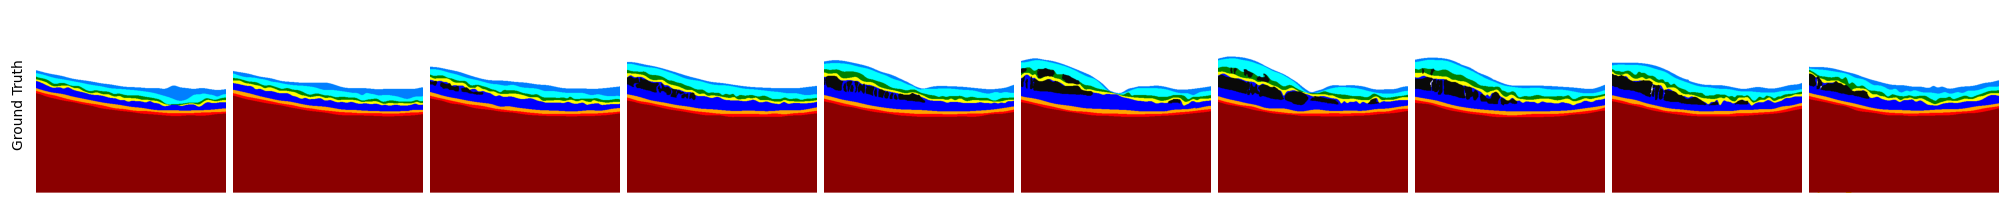

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/dme_dataset/ann_dir/val'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'Ground Truth', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


fig.savefig('/content/mmsegmentation/content/ground_truth.png', bbox_inches='tight', dpi=300)


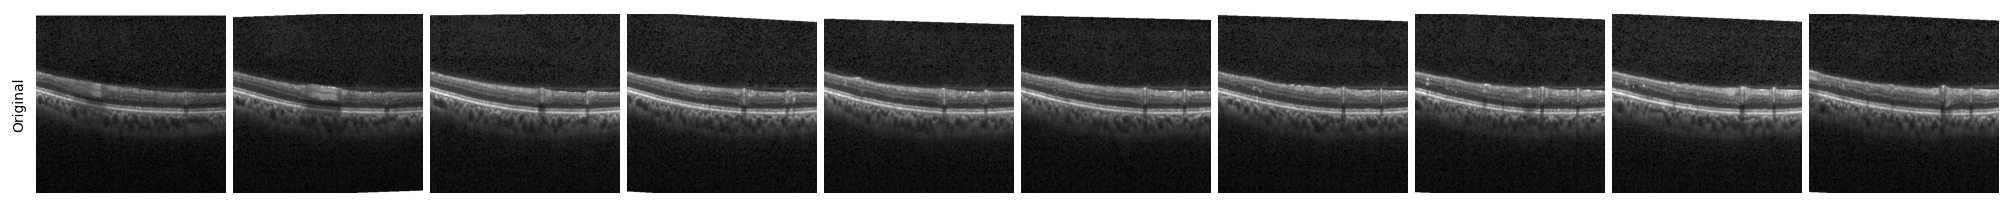

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/dme_dataset/img_dir/val'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'Original', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


fig.savefig('/content/mmsegmentation/content/original_images.png', bbox_inches='tight', dpi=300)


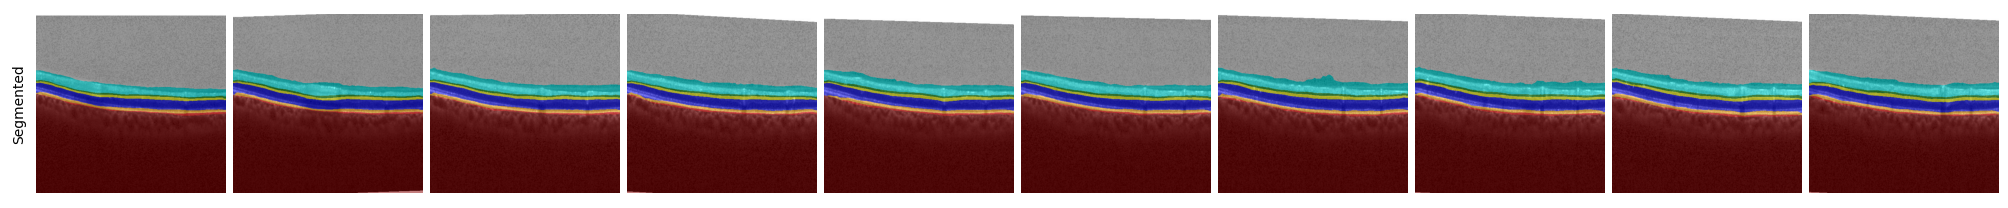

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/seg_images'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'Segmented', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

fig.savefig('/content/mmsegmentation/content/image_segmented.png', bbox_inches='tight', dpi=300)


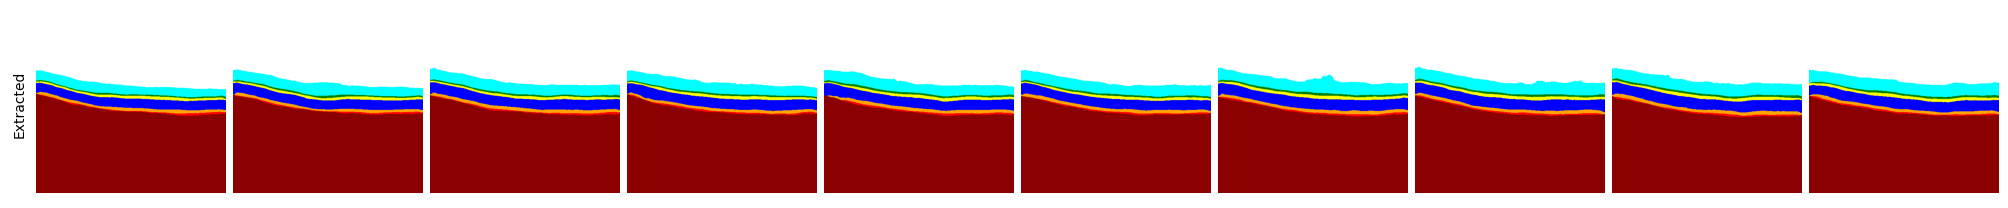

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/extract_no_legend'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'Extracted', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

fig.savefig('/content/mmsegmentation/content/extracted_images.png', bbox_inches='tight', dpi=300)


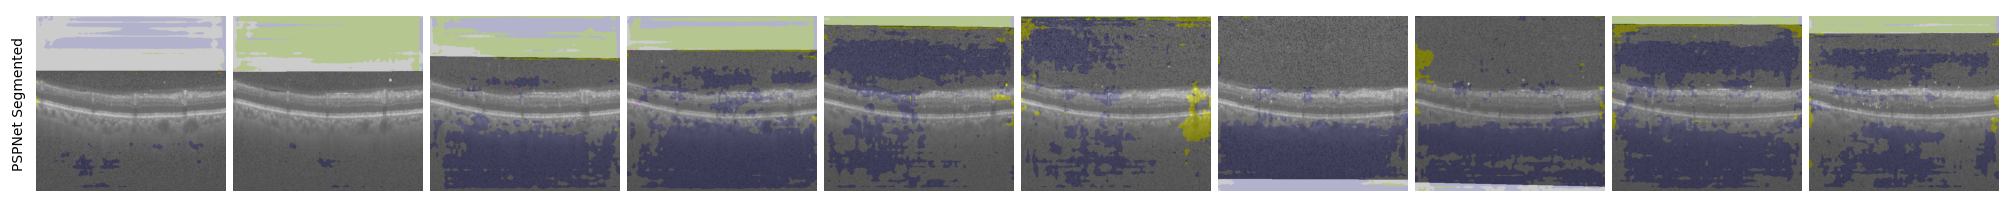

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/prefinetune_seg'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'PSPNet Segmented', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


fig.savefig('/content/mmsegmentation/content/prefinetune_seg.png', bbox_inches='tight', dpi=300)


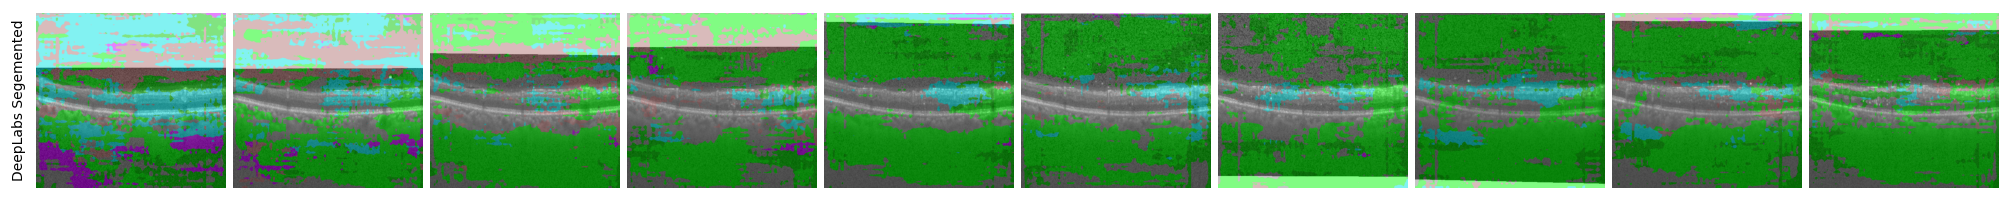

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir_path = '/content/mmsegmentation/content/deeplabs_prefinetune'

# Get all files in the directory and filter the first ten images
image_files = [os.path.join(image_dir_path, f) for f in sorted(os.listdir(image_dir_path)) if f.endswith('.png') or f.endswith('.jpg')][:10]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 11, figsize=(20, 2), gridspec_kw={'width_ratios': [1] + [10]*10})

# Set the title for the header column
axes[0].text(0.5, 0.5, 'DeepLabs Segemented', rotation=90, verticalalignment='center', horizontalalignment='center', transform=axes[0].transAxes)
axes[0].axis('off')  # Hide the axis for the header column

# Load and display each image in the rest of the axes
for ax, img_file in zip(axes[1:], image_files):  # Skip first for the label
    img = Image.open(img_file)
    ax.imshow(img, cmap='gray')
    ax.axis('off')  # Hide the axes

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


fig.savefig('/content/mmsegmentation/content/deeplabs_prefinetune.png', bbox_inches='tight', dpi=300)


# U-Net Cityscapes Model

In [ ]:
!mim download mmsegmentation --config unet-s5-d16_fcn_4xb4-160k_cityscapes-512x1024 --dest .

processing unet-s5-d16_fcn_4xb4-160k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 MiB 38.7 MB/s eta 0:00:00
Successfully downloaded fcn_unet_s5-d16_4x4_512x1024_160k_cityscapes_20211210_145204-6860854e.pth to /content/mmsegmentation
Successfully dumped unet-s5-d16_fcn_4xb4-160k_cityscapes-512x1024.py to /content/mmsegmentation


In [ ]:
cfg = Config.fromfile('configs/unet/unet-s5-d16_fcn_4xb4-160k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'data/cityscapes/'
dataset_type = 'CityscapesDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=16000, type='CheckpointHook'),
    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1

In [ ]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (512, 1024)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 10
cfg.model.auxiliary_head.num_classes = 10

# Modify dataset type and path
cfg.dataset_type = 'DMESegDataset'
cfg.data_root = 'content/dme_dataset'

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(496, 768), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(496, 768), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='img_dir/train', seg_map_path='ann_dir/train')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline


cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='img_dir/val', seg_map_path='ann_dir/val')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline


cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = 'fcn_unet_s5-d16_256x256_40k_hrf_20201223_173724-d89cf1ed.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './output/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'content/dme_dataset'
dataset_type = 'DMESegDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=200, type='CheckpointHook'),
    logger=dict(interval=10, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.75

In [ ]:
# cfg.dump('dme_config.py')

In [ ]:
runner = Runner.from_cfg(cfg)

12/18 02:56:51 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=s

In [ ]:
runner.train()

12/18 02:57:00 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by local backend from path: fcn_unet_s5-d16_256x256_40k_hrf_20201223_173724-d89cf1ed.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([2, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 64, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([2, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 64, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([10]).
12/18 02:57:01 - mmengine - INFO - Load checkpoint from fcn_unet_s5-d16_256x256_40k_hrf_202

OutOfMemoryError: ignored

# OLD CODE

In [ ]:
# def thresh(x):
#     if x <= 0.3:
#         return 0
#     else:
#         return 1

# thresh = np.vectorize(thresh, otypes=[np.float])

# def create_dataset(paths):
#     x = []
#     y = []

#     for path in tqdm(paths):
#         mat = scipy.io.loadmat(path)
#         img_tensor = mat['images']
#         fluid_tensor = mat['manualFluid1']

#         img_array = np.transpose(img_tensor, (2, 0 ,1)) / 255 #normalising
#         img_array = resize(img_array, (img_array.shape[0], width, height))
#         fluid_array = np.transpose(fluid_tensor, (2, 0 ,1))
#         #fluid_array = thresh(fluid_array)
#         fluid_array  = resize(fluid_array, (fluid_array .shape[0], width_out, height_out))

#         for idx in data_indexes:
#             x += [np.expand_dims(img_array[idx], 0)]
#             y += [np.expand_dims(fluid_array[idx], 0)]
#     return np.array(x), np.array(y)

# x_train, y_train = create_dataset(subject_path[:9])
# x_val, y_val = create_dataset(subject_path[9:])


In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((90, 1, 284, 284), (90, 1, 196, 196), (10, 1, 284, 284), (10, 1, 196, 196))

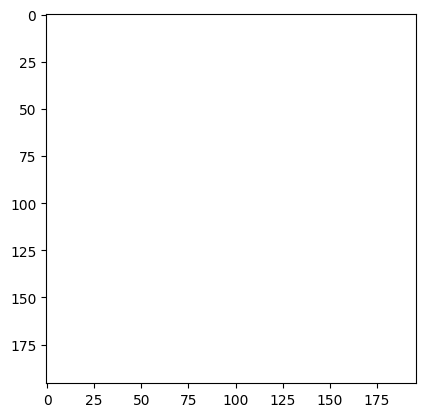

In [ ]:
plt.imshow((y_train[][0]))

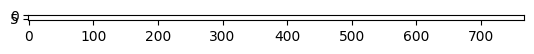

In [ ]:
plt.imshow(manual_fluid_array[1])
from PIL import Image
import numpy as np

# Assuming img_array[25] is a NumPy array representing an image
image_to_save = Image.fromarray(np.uint8(manual_fluid_tensor_1[0]))

# Save the image as "demo.png"
image_to_save.save('/content/demo.png')

In [ ]:
from mmseg.apis import MMSegInferencer
import mmcv
# Load models into memory
inferencer = MMSegInferencer(model='deeplabv3plus_r18-d8_4xb2-80k_cityscapes-512x1024')
# Inference
inferencer('/content/demo.png', out_dir='outputs', img_out_dir='vis', pred_out_dir='pred')
img = mmcv.imread('demo/demo.png')



```
# This is formatted as code
```

# Stanford Tutorial

--2023-12-17 18:06:21--  http://dags.stanford.edu/data/iccv09Data.tar.gz
Resolving dags.stanford.edu (dags.stanford.edu)... 171.64.68.10
Connecting to dags.stanford.edu (dags.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14727974 (14M) [application/x-gzip]
Saving to: ‘stanford_background.tar.gz’

stanford_background 100%[===================>]  14.04M  3.61MB/s    in 4.4s    

2023-12-17 18:06:25 (3.16 MB/s) - ‘stanford_background.tar.gz’ saved [14727974/14727974]



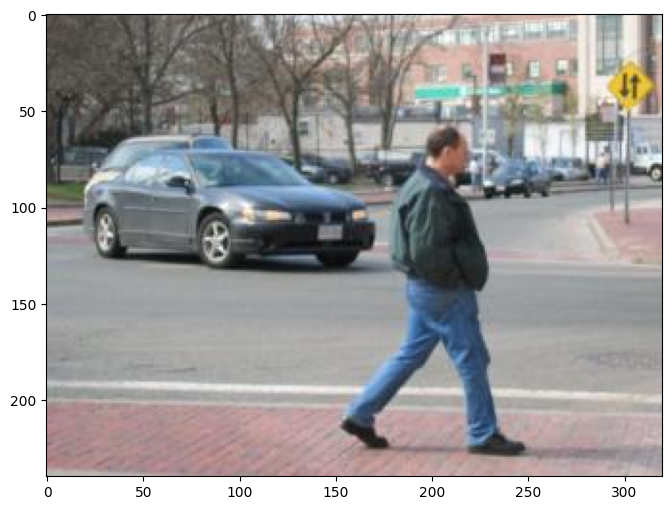

In [ ]:
# download and unzip
!wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O stanford_background.tar.gz
!tar xf stanford_background.tar.gz
import mmcv
import mmengine
import matplotlib.pyplot as plt

img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# define dataset root and directory for images and annotations
data_root = 'iccv09Data'
img_dir = 'images'
ann_dir = 'labels'
# define class and palette for better visualization
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34],
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image

# convert dataset annotation to semantic segmentation map
for file in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt',
                                                         '.png')))

[[[129 127  38]
  [129 127  38]
  [129 127  38]
  ...
  [118  20  12]
  [118  20  12]
  [118  20  12]]

 [[129 127  38]
  [129 127  38]
  [129 127  38]
  ...
  [118  20  12]
  [118  20  12]
  [118  20  12]]

 [[129 127  38]
  [129 127  38]
  [129 127  38]
  ...
  [118  20  12]
  [118  20  12]
  [118  20  12]]

 ...

 [[120  69 125]
  [120  69 125]
  [120  69 125]
  ...
  [120  69 125]
  [120  69 125]
  [120  69 125]]

 [[120  69 125]
  [120  69 125]
  [120  69 125]
  ...
  [120  69 125]
  [120  69 125]
  [120  69 125]]

 [[120  69 125]
  [120  69 125]
  [120  69 125]
  ...
  [120  69 125]
  [120  69 125]
  [120  69 125]]]


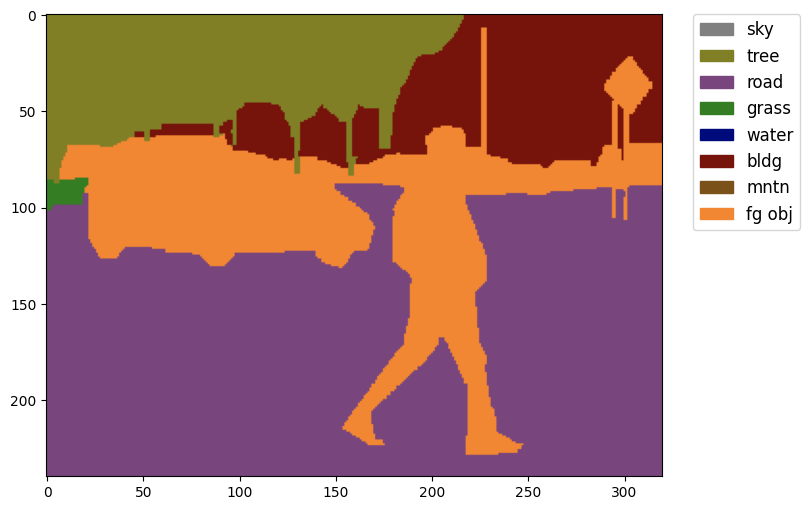

In [ ]:
import matplotlib.patches as mpatches
img = Image.open('iccv09Data/labels/6000124.png')
plt.figure(figsize=(8, 6))
print(np.array(img.convert('RGB')))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color
patches = [mpatches.Patch(color=np.array(palette[i])/255.,
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize='large')

plt.show()

In [ ]:
# split train/val set randomly
split_dir = 'splits'
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])